In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/machinelearning/Churn_Modelling - Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [ ]:
df.isnull().sum()  #chech null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.CustomerId.nunique() # no repeated values

10000

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
dfc=df.copy()

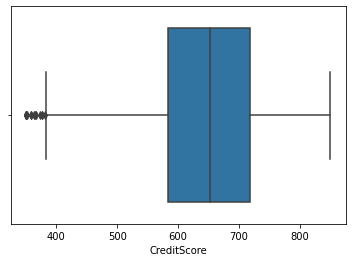

In [ ]:
sns.boxplot(x=dfc['CreditScore'])

In [ ]:
Q1cs = df['CreditScore'].quantile(0.25)
Q3cs = df['CreditScore'].quantile(0.75)
IQRcs = Q3cs - Q1cs

In [ ]:
lics=Q1cs -1.5 * IQRcs
lics

383.0

In [ ]:
dfc= dfc[~((dfc['CreditScore']<383))] 

In [ ]:
dfc['CreditScore'].min()

383

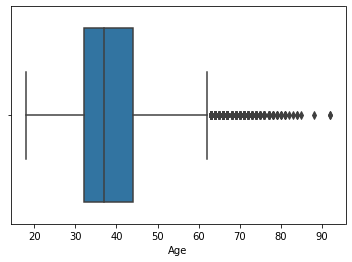

In [ ]:
sns.boxplot(x=dfc['Age'])

In [ ]:
Q1Age = df['Age'].quantile(0.25)
Q3Age = df['Age'].quantile(0.75)
IQRAge = Q3Age - Q1Age

In [ ]:
lsa=Q3Age +1.5 * IQRAge
lsa

62.0

In [ ]:
dfc= dfc[~((dfc['Age'] > 80))] 

In [ ]:
dfc['Age'].max()

80

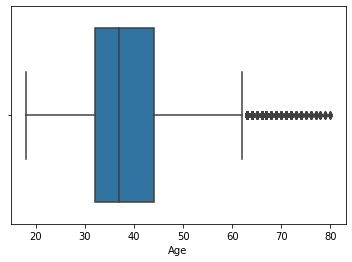

In [ ]:
sns.boxplot(x=dfc['Age'])

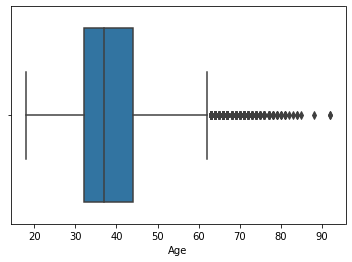

In [ ]:
sns.boxplot(x=df['Age'])

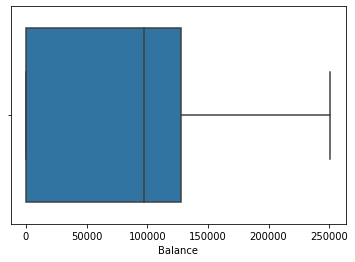

In [ ]:
sns.boxplot(x=df['Balance'])

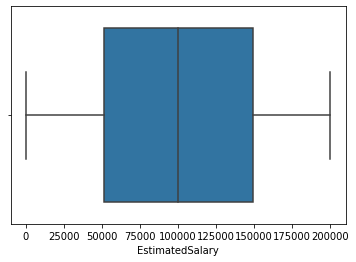

In [ ]:
sns.boxplot(x=df['EstimatedSalary'])

In [ ]:
dfc.Balance.value_counts()

0.00         3606
130170.82       2
105473.74       2
132371.30       1
125385.01       1
             ... 
98807.45        1
136596.85       1
81556.89        1
112687.69       1
130142.79       1
Name: Balance, Length: 6366, dtype: int64

Text(0.5, 1.0, 'Balance')

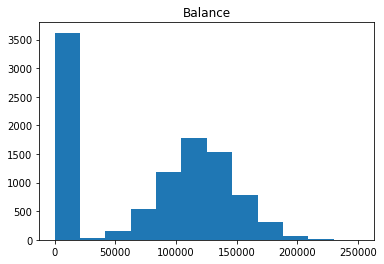

In [ ]:
plt.hist(df['Balance'],bins=12)
plt.title('Balance')

In [ ]:
dfc.shape

(9973, 14)

In [ ]:
dfc['Gender2']=np.where(dfc.Gender=='Female',1, 0)

In [ ]:
dfc=pd.concat([dfc,pd.get_dummies(dfc.Geography)], axis=1)

In [ ]:
dfc

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender2,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,0,1,0


In [ ]:
dfc=dfc.drop(columns=["RowNumber", "Surname","Geography","Gender","CustomerId"])

In [ ]:
dfc

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender2,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1,0


In [ ]:
first_column = dfc.pop('Exited') 
dfc.insert(0, 'Exited', first_column)

In [ ]:
dfc

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,0,608,41,1,83807.86,1,0,1,112542.58,1,0,0,1
2,1,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,0,699,39,1,0.00,2,0,0,93826.63,1,1,0,0
4,0,850,43,2,125510.82,1,1,1,79084.10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,0,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,1,709,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,1,772,42,3,75075.31,2,1,0,92888.52,0,0,1,0


## Split and shuffle the data

#### Normalize the Data

In [ ]:
dfc=(dfc- dfc.min()) / ( dfc.max() - dfc.min())

In [ ]:
dfc['CustomerId']=df['CustomerId']

In [ ]:
dfc

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain,CustomerId
0,1.0,0.505353,0.387097,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,15634602
1,0.0,0.481799,0.370968,0.1,0.334031,0.000000,0.0,1.0,0.562709,1.0,0.0,0.0,1.0,15647311
2,1.0,0.254818,0.387097,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,15619304
3,0.0,0.676660,0.338710,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,1.0,0.0,0.0,15701354
4,0.0,1.000000,0.403226,0.2,0.500246,0.000000,1.0,1.0,0.395400,1.0,0.0,0.0,1.0,15737888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.830835,0.338710,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,15606229
9996,0.0,0.284797,0.274194,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,15569892
9997,1.0,0.698073,0.290323,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,15584532
9998,1.0,0.832976,0.387097,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,0.0,1.0,0.0,15682355


#### shuffle the data

In [ ]:
np.random.seed(0)
i = np.arange(len(dfc))
np.random.shuffle(i)
train = dfc.iloc[i[:int(len(dfc)*0.70)]]
test = dfc.iloc[i[int(len(dfc)*0.70):]]

#### Train Data

In [ ]:
train.shape

(6981, 14)

In [ ]:
y_train=train['Exited']

In [ ]:
X_train = train[train.columns[1:-1]]

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain
3694,0.481799,0.241935,0.4,0.000000,0.000000,1.0,0.0,0.396502,1.0,1.0,0.0,0.0
2553,0.736617,0.854839,0.8,0.000000,0.000000,1.0,1.0,0.992271,0.0,0.0,0.0,1.0
838,0.364026,0.483871,0.3,0.000000,0.000000,0.0,1.0,0.153612,1.0,0.0,0.0,1.0
6873,0.524625,0.306452,0.9,0.000000,0.333333,1.0,1.0,0.173408,1.0,1.0,0.0,0.0
5156,0.368308,0.241935,0.5,0.507550,0.000000,0.0,1.0,0.608947,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,0.715203,0.338710,0.6,0.000000,0.333333,1.0,0.0,0.466365,1.0,0.0,0.0,1.0
1346,0.556745,0.193548,0.5,0.376423,0.000000,1.0,1.0,0.828093,0.0,1.0,0.0,0.0
1902,0.835118,0.241935,1.0,0.000000,0.000000,1.0,1.0,0.494090,1.0,0.0,0.0,1.0
7904,0.141328,0.225806,0.0,0.620249,0.000000,1.0,1.0,0.833482,0.0,0.0,0.0,1.0


In [ ]:
y_train=y_train.to_numpy()
X_train=X_train.to_numpy()

#### Test Data

In [ ]:
y_test=test['Exited']

In [ ]:
X_test = test[test.columns[1:-1]]

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain
98,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0
2055,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0
7582,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0
1186,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0
2424,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9249,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0
4873,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0
3276,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0
9872,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0


In [ ]:
y_test=y_test.to_numpy()
X_test=X_test.to_numpy()

## Useful Functions

In [ ]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def bin_cross_entropy(y,p_hat):
  return (-1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

## Simple Logistic Regression

In [ ]:
class SimpleLogisticRegression():

  def __init__(self,thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.B=None
  
  def fit(self,X,y,eta=1e-3,epochs=1e3, show_curve=False):

    epochs=int(epochs)
    N,D = X.shape

    #Initialize Weights and Bias
    self.W = np.random.randn(D)
    self.B = np.random.randn(1)

    J=np.zeros(epochs)

    for epoch in range(epochs):

      p_hat = self.__forward__(X)
      J[epoch]=bin_cross_entropy(y,p_hat)

      #Weghts and Bias updated
      self.W -=eta*(1/N)*X.T@(p_hat-y)
      self.B -=eta*(1/N)*np.sum(p_hat-y)
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Trainig curve')
  def __forward__(self,X):
    return sigmoid(X@self.W+self.B)
  
  def predict(self,X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)

In [ ]:
  log_reg = SimpleLogisticRegression()

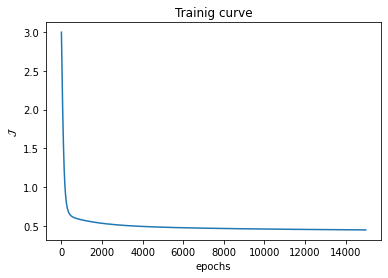

In [ ]:
  np.random.seed(0)
  log_reg.fit(X_train,y_train,eta=9e-3,epochs=15000,show_curve=True)

In [ ]:
 y_hat= log_reg.predict(X_train)

In [ ]:
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
y_hat.sum()

179

In [ ]:
accuracy(y_train,y_hat)

0.8037530439765077

#### Predict test

In [ ]:
 y_hatt= log_reg.predict(X_test)

In [ ]:
y_hatt

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
y_hatt.sum()

81

In [ ]:
accuracy(y_test,y_hatt)

0.8118315508021391

In [ ]:
W=log_reg.W
W

array([-0.02541688,  1.82992671, -0.25257472,  1.14398176,  0.63587816,
       -0.16064822, -0.86835362, -0.32314248,  0.43572388, -0.38464166,
        0.22376124, -0.28790106])

In [ ]:
B=log_reg.B
B

array([-1.69665933])

In [ ]:
Ws=np.append(B,W)
Ws

array([-1.69665933, -0.02541688,  1.82992671, -0.25257472,  1.14398176,
        0.63587816, -0.16064822, -0.86835362, -0.32314248,  0.43572388,
       -0.38464166,  0.22376124, -0.28790106])

In [ ]:
X_test

array([[0.70021413, 0.06451613, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.18415418, 0.32258065, 0.9       , ..., 0.        , 1.        ,
        0.        ],
       [0.88650964, 0.24193548, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.88008565, 0.58064516, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.43897216, 0.30645161, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.65524625, 0.06451613, 0.4       , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
X1 = pd.DataFrame(X_test)

In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0
1,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0
2,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0
3,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0
4,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2987,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0
2988,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0
2989,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0
2990,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0


In [ ]:
X1.shape

(2992, 12)

In [ ]:
uno=[1]*2992

In [ ]:
X1['uno']=uno

In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11,uno
0,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0,1
1,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0,1
2,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0,1
3,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0,1
4,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0,1
2988,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0,1
2989,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0,1
2990,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0,1


In [ ]:
f_column = X1.pop('uno') 
X1.insert(0, 'uno', f_column)

In [ ]:
X1

,uno,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0
1,1,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0
2,1,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0
3,1,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0
4,1,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,1,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0
2988,1,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0
2989,1,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0
2990,1,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0


In [ ]:
X1=X1.to_numpy()

In [ ]:
X1

array([[1.        , 0.70021413, 0.06451613, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.18415418, 0.32258065, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.88650964, 0.24193548, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.88008565, 0.58064516, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.43897216, 0.30645161, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.65524625, 0.06451613, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
lrm= np.matmul(X1,Ws)

In [ ]:
lrm

array([-2.03539264, -0.61592643, -0.60129708, ..., -1.01566859,
       -2.44531075, -1.70342403])

In [ ]:
np.shape(Ws)

(13,)

In [ ]:
np.shape(X1)

(2992, 13)

In [ ]:
np.shape(lrm)

(2992,)

In [ ]:
lrm1 = pd.DataFrame(lrm)

In [ ]:
lrm1

,0
0,-2.035393
1,-0.615926
2,-0.601297
3,-1.862660
4,-2.724077
...,...
2987,-1.376382
2988,-2.645212
2989,-1.015669
2990,-2.445311


In [ ]:
lrm1.min()

0   -3.419046
dtype: float64

In [ ]:
oddsr=np.exp(lrm1)

In [ ]:
test

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain,CustomerId
98,0.0,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0,15604348
2055,0.0,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0,15705991
7582,0.0,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0,15770255
1186,0.0,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0,15589257
2424,0.0,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0,15782941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,0.0,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0,15795747
4873,0.0,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0,15702337
3276,0.0,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0,15577806
9872,0.0,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0,15648032


In [ ]:
testc=test.copy()

In [ ]:
testc=testc.reset_index(drop=True)

In [ ]:
testc

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender2,France,Germany,Spain,CustomerId
0,0.0,0.700214,0.064516,0.8,0.000000,0.333333,0.0,0.0,0.498215,0.0,0.0,0.0,1.0,15604348
1,0.0,0.184154,0.322581,0.9,0.452771,0.000000,0.0,0.0,0.059699,0.0,0.0,1.0,0.0,15705991
2,0.0,0.886510,0.241935,1.0,0.333026,0.000000,0.0,0.0,0.348811,1.0,0.0,1.0,0.0,15770255
3,0.0,0.614561,0.274194,0.3,0.412379,0.333333,1.0,1.0,0.873161,1.0,1.0,0.0,0.0,15589257
4,0.0,0.406852,0.209677,0.2,0.000000,0.333333,1.0,1.0,0.459773,0.0,1.0,0.0,0.0,15782941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,0.0,0.865096,0.338710,0.7,0.684129,0.000000,0.0,1.0,0.503947,1.0,0.0,0.0,1.0,15795747
2988,0.0,0.423983,0.306452,0.7,0.000000,0.333333,1.0,1.0,0.371581,0.0,1.0,0.0,0.0,15702337
2989,0.0,0.880086,0.580645,0.1,0.302517,0.000000,1.0,1.0,0.960807,1.0,0.0,1.0,0.0,15577806
2990,0.0,0.438972,0.306452,0.2,0.000000,0.333333,0.0,1.0,0.939115,0.0,0.0,0.0,1.0,15648032


In [ ]:
oddsr['CustomerId']=testc['CustomerId']

In [ ]:
oddsr

,0,CustomerId
0,0.130629,15604348
1,0.540140,15705991
2,0.548100,15770255
3,0.155259,15589257
4,0.065607,15782941
...,...,...
2987,0.252490,15795747
2988,0.070990,15702337
2989,0.362160,15577806
2990,0.086699,15648032


In [ ]:
risk1= oddsr.loc[(oddsr[0] >=1) & (oddsr[0] <= 2)]

In [ ]:
risk1

,0,CustomerId
5,1.061718,15728224
39,1.506586,15692750
92,1.119829,15718242
121,1.364462,15797960
201,1.723552,15790113
...,...,...
2791,1.026838,15610446
2815,1.396764,15723907
2932,1.488050,15595324
2956,1.342289,15603465


In [ ]:
risk2= oddsr.loc[(oddsr[0] >2) & (oddsr[0] <= 3)]

In [ ]:
risk2

,0,CustomerId
100,2.523503,15737647
495,2.862267,15778975
2352,2.303044,15775761
2448,2.220147,15570002
2818,2.250549,15640846


In [ ]:
risk3 = oddsr.loc[oddsr[0] > 3]

In [ ]:
risk3

,0,CustomerId
2628,4.060738,15653776


In [ ]:
Risk = pd.DataFrame({'Risk level': ['risk1', 'risk2', 'risk3'],
                    'Number': ['75', '5', '1'],
                     'OddsRatio':['1<=OR<=2','2<OR<=3','OR>3']})

In [ ]:
Risk

,Risk level,Number,OddsRatio
0,risk1,75,1<=OR<=2
1,risk2,5,2<OR<=3
2,risk3,1,OR>3


## Plots

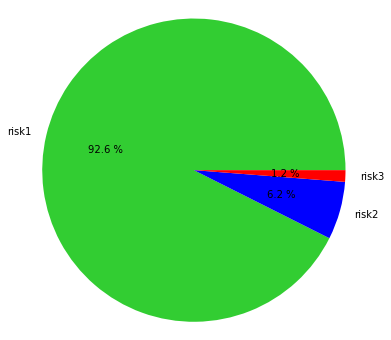

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(Risk['Number'], labels=Risk['Risk level'], autopct="%0.1f %%",colors=['limegreen','b','r'])
plt.axis("equal")
plt.show()

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
import shap

In [ ]:
f = lambda x: log_reg.predict(x)
med = np.median(X_train, axis = 0).reshape(1, X_train.shape[1])
explainer = shap.Explainer(f, med,
feature_names = ['CreditScore','Age','Tenure','Balance','NumOfProducts',
'HasCrCard','IsActiveMember','EstimatedSalary','Gender2','France','Germany','Spain'])
shap_values = explainer(X_test)

Permutation explainer: 2993it [00:43, 61.68it/s]                           


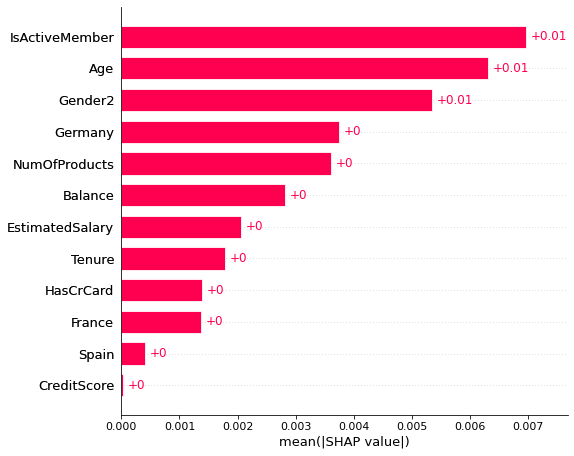

In [ ]:
shap.plots.bar(shap_values, max_display=13)

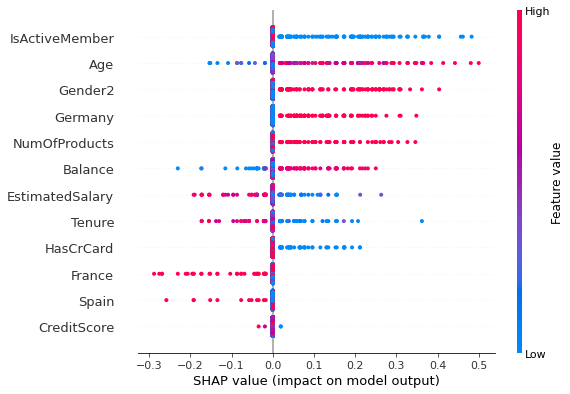

In [ ]:
shap.plots.beeswarm(shap_values, max_display=14)